In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import numpy as np

In [75]:
personal_data = pd.read_csv("customer_data.csv")
campaign_data = pd.read_csv("campaign_data.csv")
join = personal_data.merge(campaign_data, on = 'index', how = "inner")
join

,index,Income,Kidhome,Teenhome,Recency,Complain,Age,Customer_Days,marital_Divorced,marital_Married,...,education_Basic,education_Graduation,education_Master,education_PhD,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,0,58138.0,0,0,58,0,63,2822,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,46344.0,1,1,38,0,66,2272,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,71613.0,0,0,26,0,55,2471,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,26646.0,1,0,26,0,36,2298,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,58293.0,1,0,94,0,39,2320,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,0,53,2540,0,1,...,0,1,0,0,0,0,0,0,0,0
2201,2201,64014.0,2,1,56,0,74,2178,0,0,...,0,0,0,1,0,0,0,1,0,0
2202,2202,56981.0,0,0,91,0,39,2314,1,0,...,0,1,0,0,0,1,0,0,0,0
2203,2203,69245.0,0,1,8,0,64,2315,0,0,...,0,0,1,0,0,0,0,0,0,0


In [126]:
personal_data_column = personal_data.drop(columns=["index"]).columns.to_list()
campaign_data_column = campaign_data.drop(columns="index").columns.to_list()
personal_data_column

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'Complain',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'accept01']

In [103]:

correlation_matrix = join[personal_data_column + campaign_data_column].corr()
correlation_with_campaigns = correlation_matrix.loc[personal_data_column, campaign_data_column]
correlation_with_campaigns["Average campaign"] = correlation_with_campaigns[['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].mean(axis = 1)
correlation_with_campaigns.sort_values(by = "Average campaign", axis = 0, ascending=False)


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Average campaign
Income,-0.011181,0.233267,0.416386,0.345242,0.110210,0.174902,0.211471
education_PhD,0.020276,0.040317,0.013747,-0.002937,0.033530,0.089627,0.032427
Customer_Days,-0.007952,0.015723,-0.004550,-0.040197,0.006021,0.196520,0.027594
marital_Single,0.015739,-0.014598,-0.011975,0.001264,-0.014165,0.113703,0.014995
marital_Widow,-0.015375,0.041191,0.013863,0.001070,-0.000730,0.045285,0.014217
marital_Divorced,0.016999,0.005052,-0.021635,-0.016996,0.023960,0.054967,0.010391
Age,-0.061405,0.069903,-0.019275,0.011747,0.007737,-0.021305,-0.002100
education_Graduation,-0.014825,-0.013071,0.016503,0.030759,0.006711,-0.040749,-0.002445
education_Master,-0.013577,0.018283,0.001983,-0.027079,-0.031132,0.003509,-0.008002
Complain,0.009535,-0.027120,-0.008464,-0.025101,-0.011236,-0.000273,-0.010443


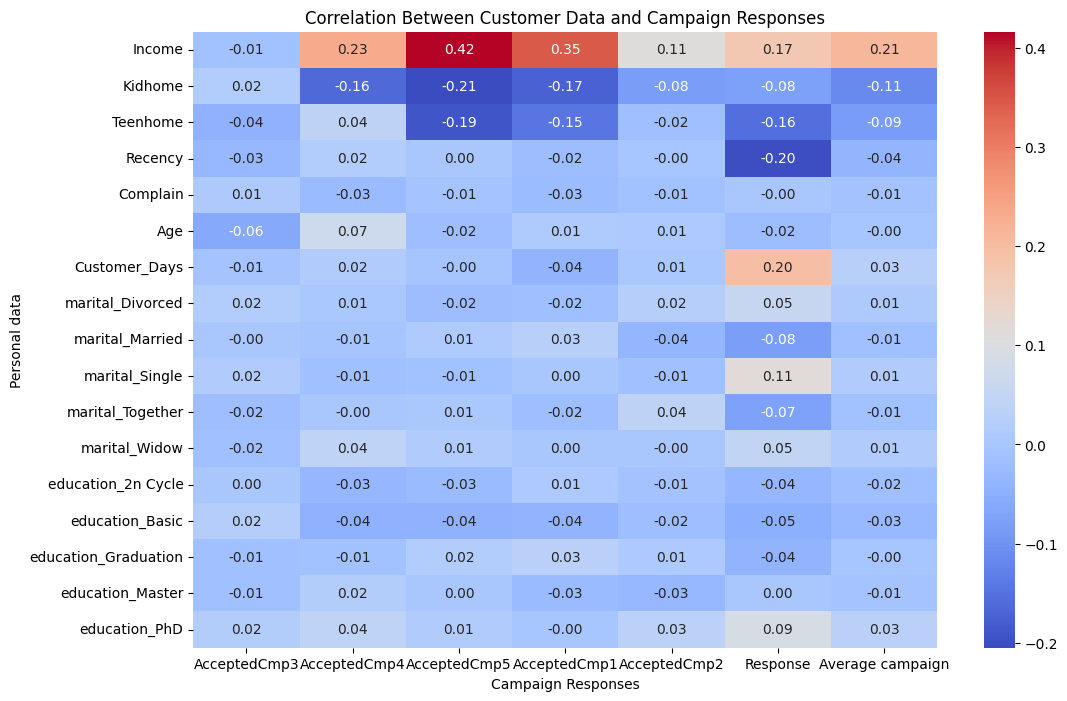

In [104]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_campaigns, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Customer Data and Campaign Responses')
plt.xlabel('Campaign Responses')
plt.ylabel('Personal data')
plt.show()

In [90]:
join[['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].astype(int)
join["total_acc"] = join[['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].sum(axis=1)
join

,index,Income,Kidhome,Teenhome,Recency,Complain,Age,Customer_Days,marital_Divorced,marital_Married,...,education_Graduation,education_Master,education_PhD,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,total_acc
0,0,58138.0,0,0,58,0,63,2822,0,0,...,1,0,0,0,0,0,0,0,1,1
1,1,46344.0,1,1,38,0,66,2272,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,71613.0,0,0,26,0,55,2471,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,26646.0,1,0,26,0,36,2298,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,58293.0,1,0,94,0,39,2320,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,0,53,2540,0,1,...,1,0,0,0,0,0,0,0,0,0
2201,2201,64014.0,2,1,56,0,74,2178,0,0,...,0,0,1,0,0,0,1,0,0,1
2202,2202,56981.0,0,0,91,0,39,2314,1,0,...,1,0,0,0,1,0,0,0,0,1
2203,2203,69245.0,0,1,8,0,64,2315,0,0,...,0,1,0,0,0,0,0,0,0,0


In [109]:
X = join[personal_data_column]
y = join["total_acc"]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [119]:
for i in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of level {i}: {accuracy:.2f}")  
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of level {i}: {accuracy:.2f}")

Accuracy of level 1: 0.75
Accuracy of level 2: 0.75
Accuracy of level 3: 0.75
Accuracy of level 4: 0.74
Accuracy of level 5: 0.71
Accuracy of level 6: 0.72
Accuracy of level 7: 0.69
Accuracy of level 8: 0.71
Accuracy of level 9: 0.69
Accuracy of level 10: 0.70
Accuracy of level 11: 0.68
Accuracy of level 12: 0.65
Accuracy of level 13: 0.65
Accuracy of level 14: 0.64
Accuracy of level 15: 0.63
Accuracy of level 16: 0.65
Accuracy of level 17: 0.64
Accuracy of level 18: 0.63
Accuracy of level 19: 0.64
Accuracy of level 19: 0.75


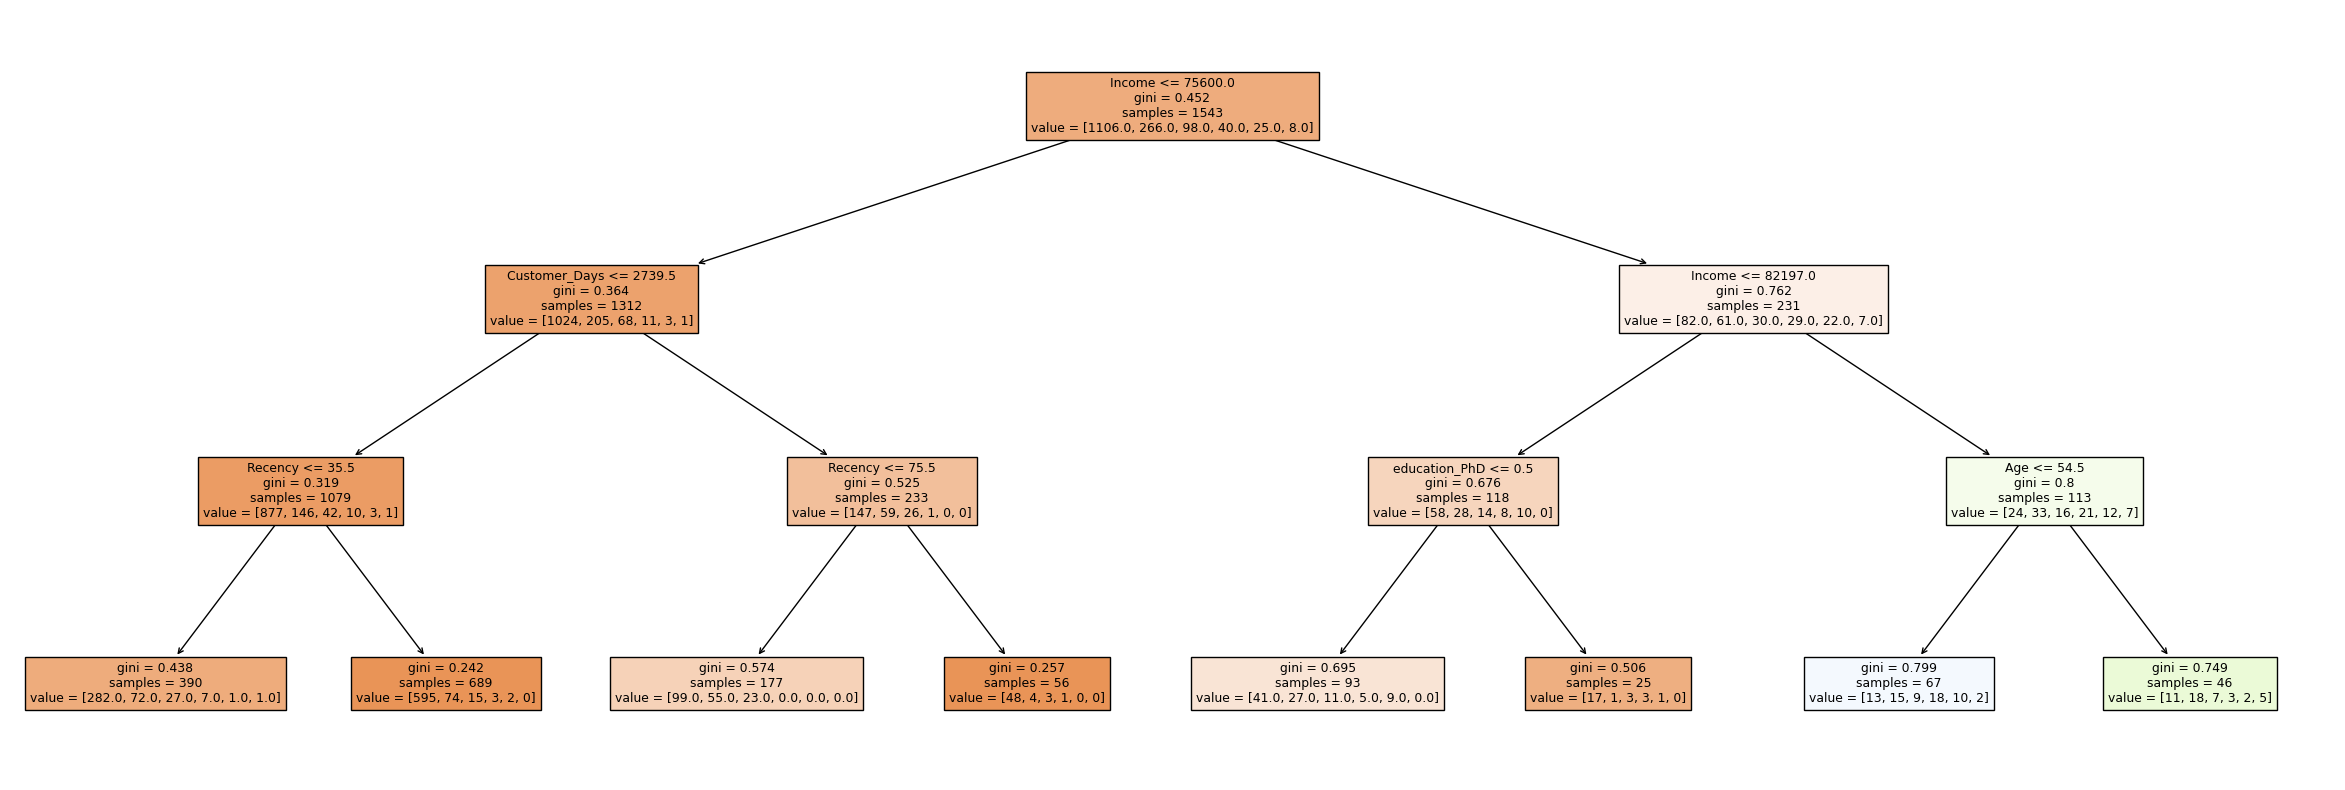

In [121]:
plt.figure(figsize=(30, 10))
p = plot_tree(clf, filled = True, feature_names = X.columns)
plt.show()


AB testing

In [122]:
from scipy.stats import ttest_ind


In [136]:
AB_raw = personal_data.filter(['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']).astype(int)
AB_test_list = ['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']
AB_raw["acceptTF"] = (join["total_acc"] >= 1).astype(int)
AB_raw

,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,acceptTF
0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2200,0,1,0,0,0,0,0,1,0,0,0
2201,0,0,0,1,0,0,0,0,0,1,1
2202,1,0,0,0,0,0,0,1,0,0,1
2203,0,0,0,1,0,0,0,0,1,0,0


In [149]:


AB_result = {"Tests": ['marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD']}
AB_result = pd.DataFrame(AB_result)
for f in AB_test_list:
    group_a = AB_raw[AB_raw[f] == 0]['acceptTF']
    group_b = AB_raw[AB_raw[f] == 1]['acceptTF']

    t_stat, p_value = ttest_ind(group_a, group_b)

    AB_result.loc[AB_result["Tests"] == f, "t_stat"] = t_stat
    AB_result.loc[AB_result["Tests"] == f, "p_value"] =  p_value

    # print(f"T-Statistic for {f}: {t_stat}")
    # print(f"P-Value for {f}: {p_value}")
AB_result

,Tests,t_stat,p_value
0,marital_Divorced,-0.936759,0.348985
1,marital_Married,1.758060,0.078876
2,marital_Single,-2.244376,0.024907
3,marital_Together,1.374527,0.169418
4,marital_Widow,-1.356357,0.175125
5,education_2n Cycle,1.542938,0.122989
6,education_Basic,2.409328,0.016063
7,education_Graduation,0.847501,0.396808
8,education_Master,0.091016,0.927488
9,education_PhD,-3.094078,0.001999
